In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

C:\Users\manis\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#We see we have 13 features, lets try to get the name of the features
bos.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos.columns = ['CRIM','ZN', 'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE', 'DIS', 'RAD' ,'TAX', 'PTRATIO'
 ,'B' ,'LSTAT']

In [6]:
#Dataset with all features names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Lets see the description
#As can be seen, we have been given all values except target variable
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
bos["Target"] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


In [9]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
#We will have to normalize the features as there are a lot of differneces in range of values for different features
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'count')

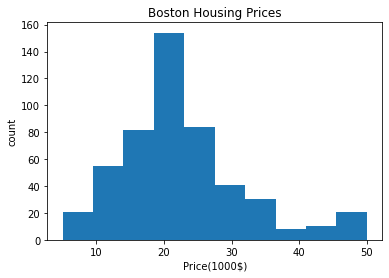

In [11]:
plt.hist(bos["Target"])
plt.title("Boston Housing Prices")
plt.xlabel("Price(1000$)")
plt.ylabel("count")

In [39]:
bos_x = bos.drop(columns = ["Target"])

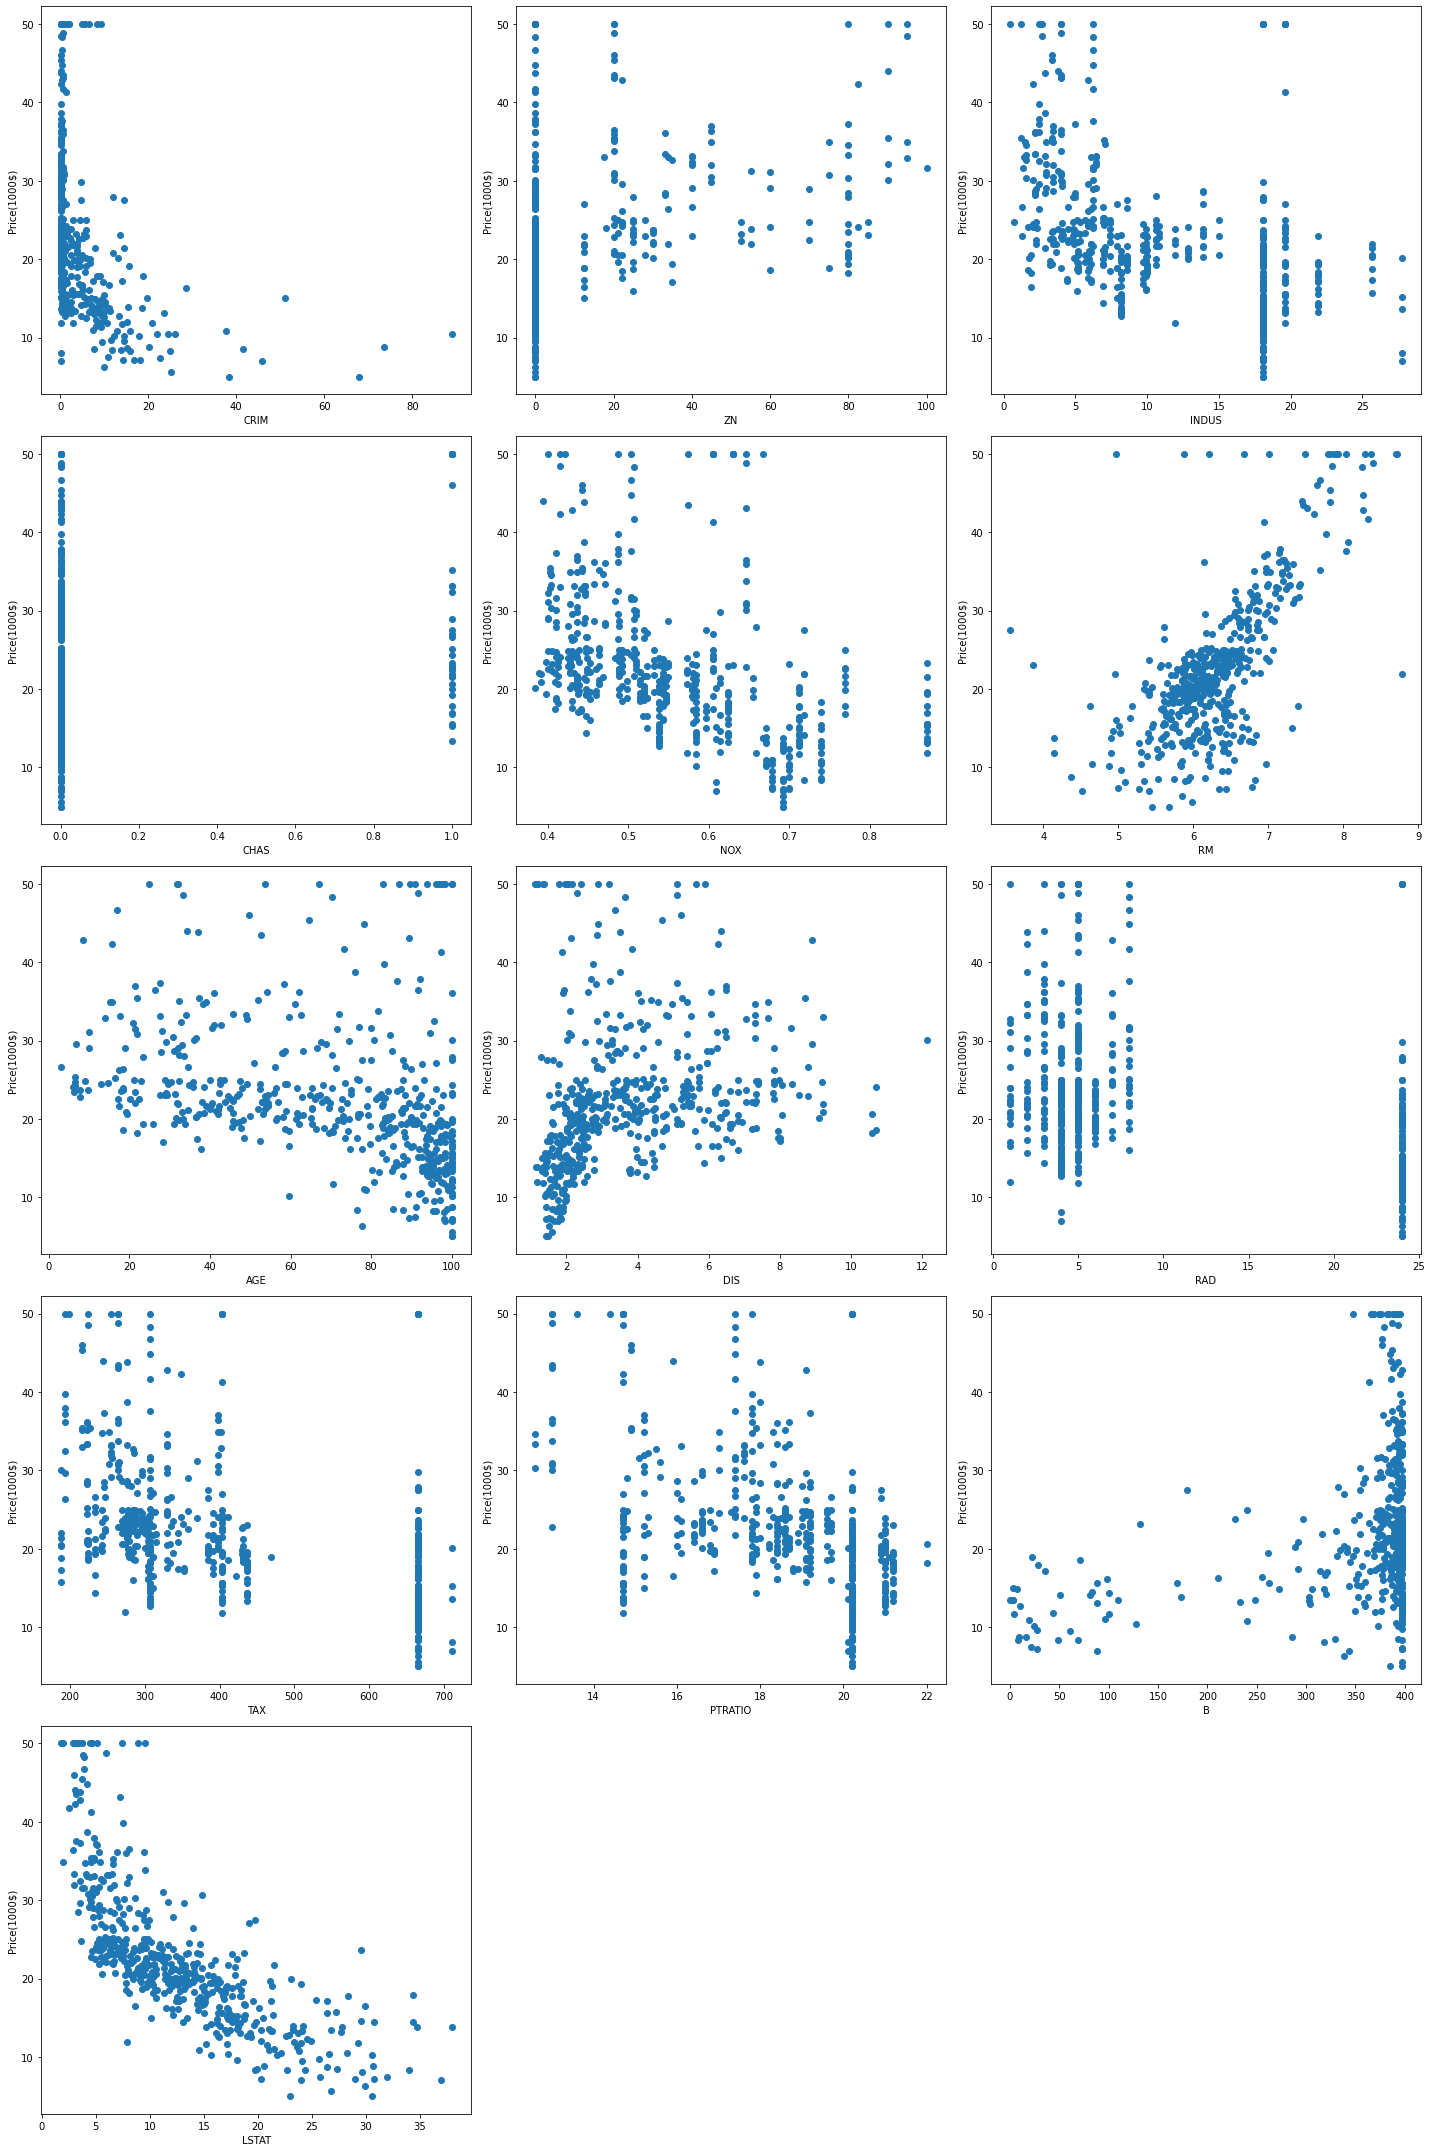

In [13]:
plt.figure(figsize=(20,30), facecolor='white')


plotnum = 1
for feature in bos_x:
    if plotnum<=15:
        ax = plt.subplot(5,3,plotnum)
        plt.scatter(bos_x[feature],bos["Target"])
        plt.xlabel(feature)
        plt.ylabel("Price(1000$)")
    plotnum +=1
plt.tight_layout()   

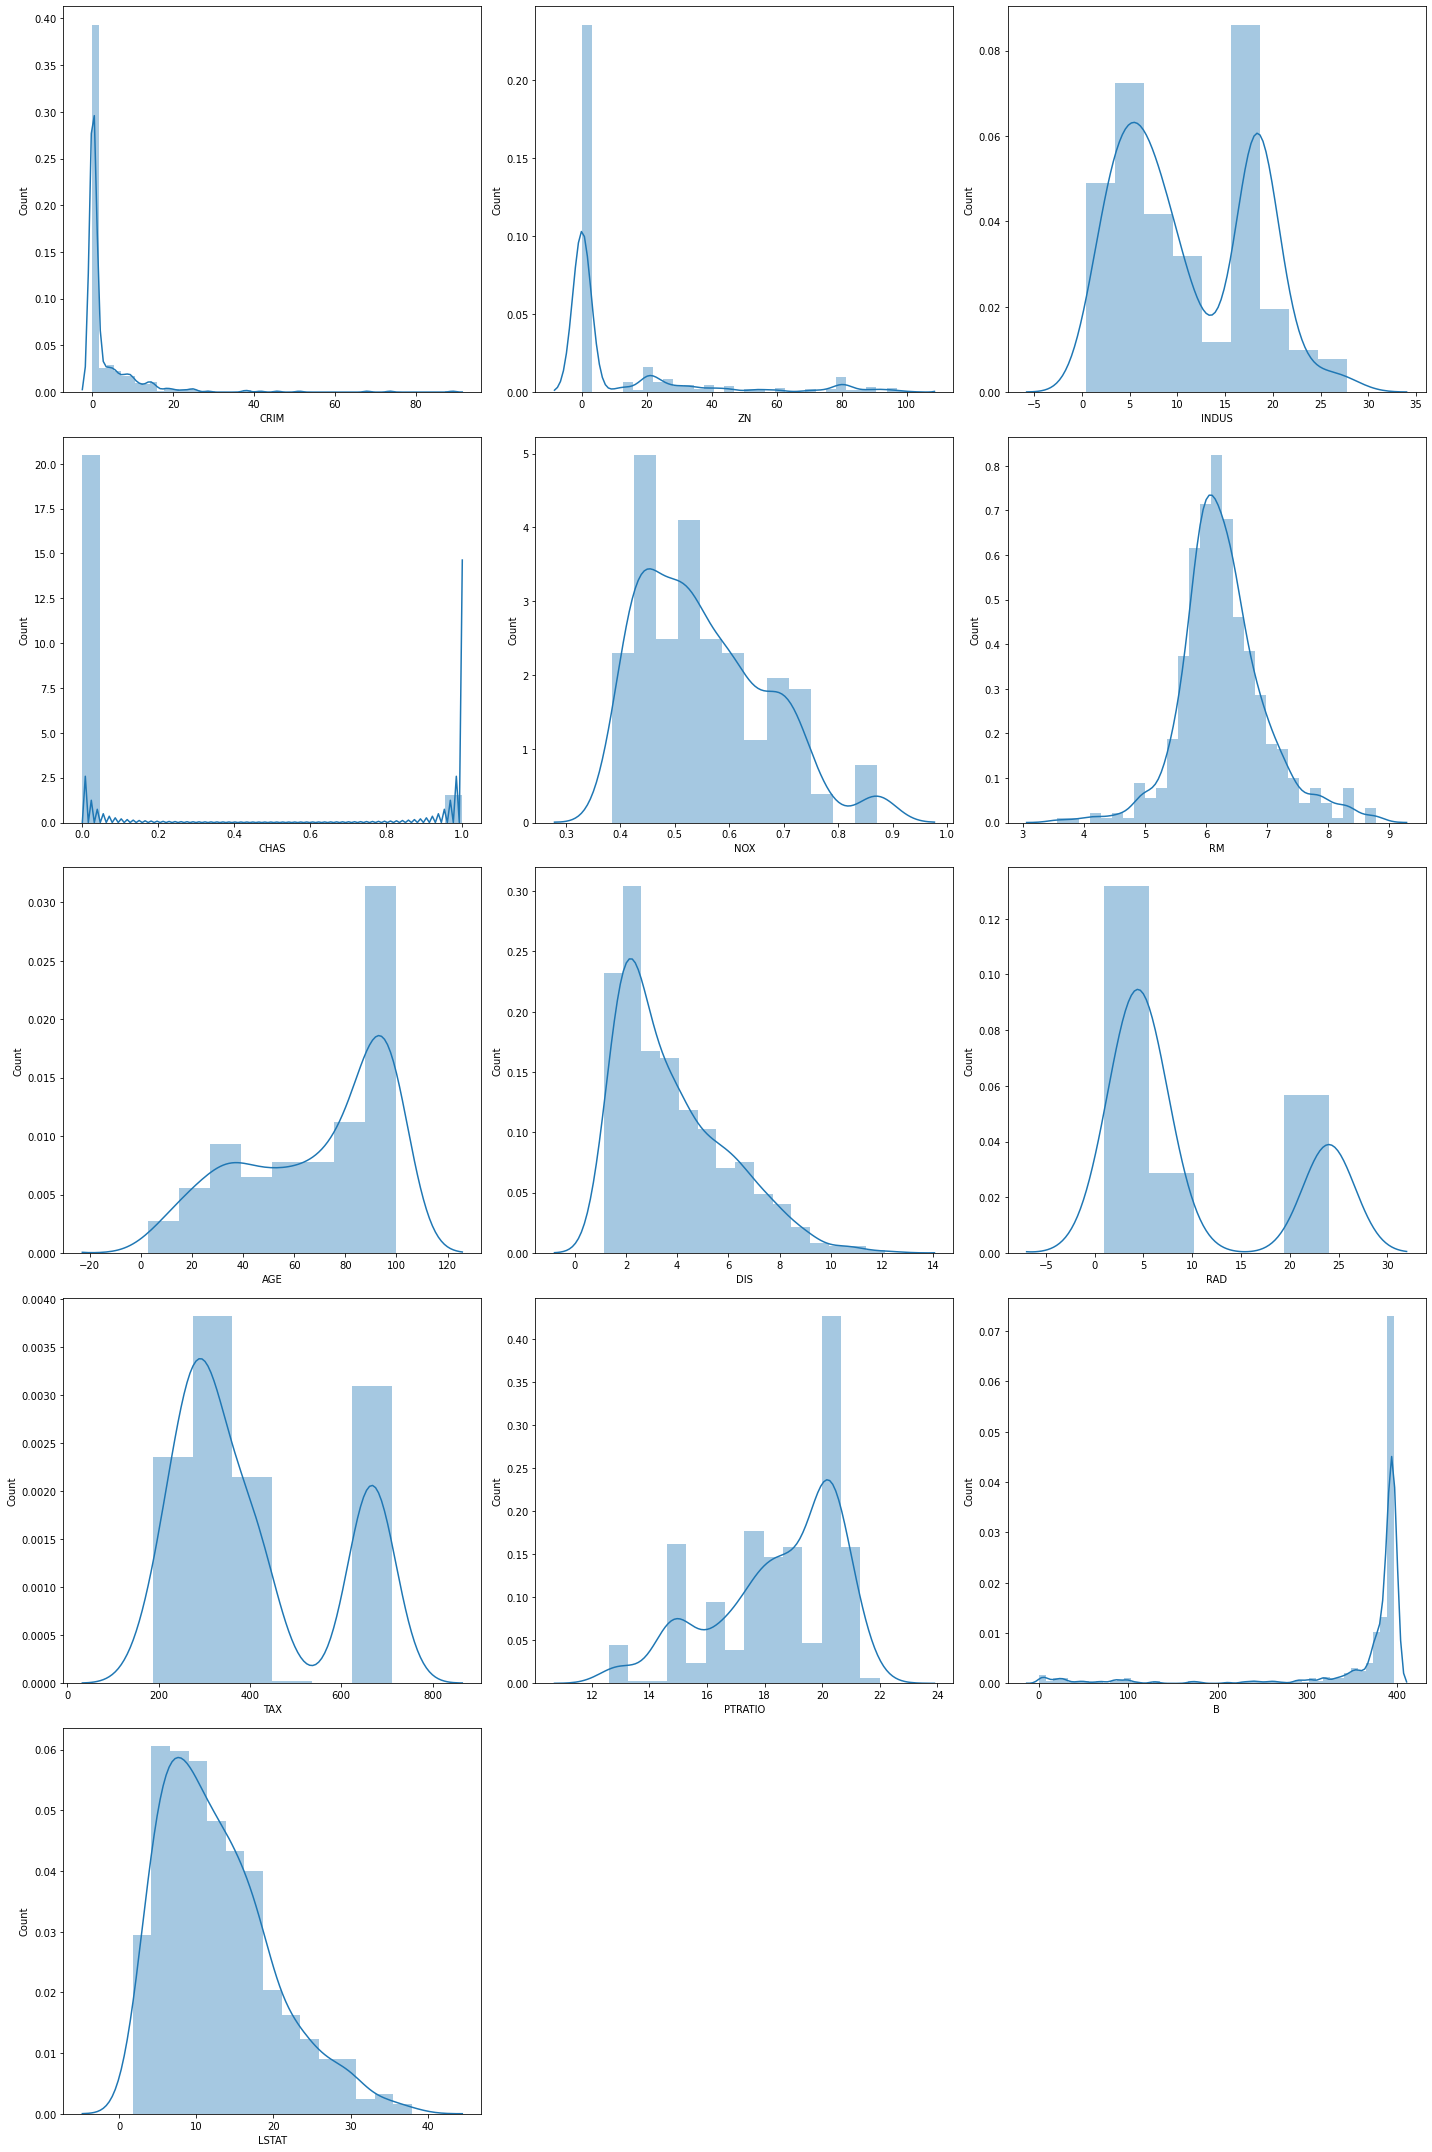

In [14]:
plt.figure(figsize=(20,30), facecolor='white')


plotnum = 1
for feature in bos_x:
    if plotnum<=15:
        ax = plt.subplot(5,3,plotnum)
        sns.distplot(bos_x[feature])
        plt.xlabel(feature)
        plt.ylabel("Count")
    plotnum +=1
plt.tight_layout()   

In [15]:
#We have to scale the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(bos_x)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_scaled, i ) for i in range(x_scaled.shape[1])]
vif["Features"] = bos_x.columns


In [31]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


RAD and TAX have vif greater than 5, lets see what kind of relationship they have

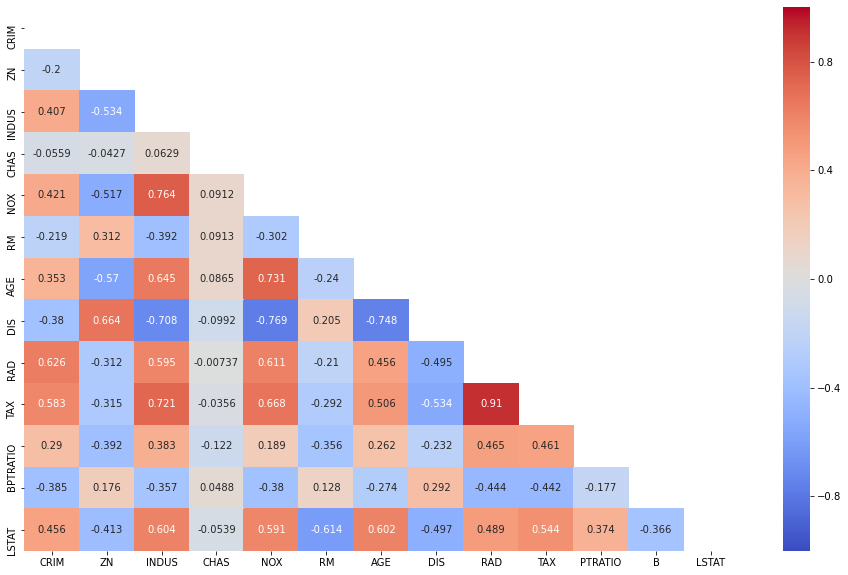

In [41]:
# lETS SEE CORRELATION HEATMAP
plt.figure(figsize = (16,10))
corr = bos_x.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot = True, fmt = '.3g', vmin=-1, vmax=1, center = 0, cmap = 'coolwarm', mask = mask)
plt.show()

In [32]:
#NOX AND INDUS have a hugh correlation value (0.764)
#This makes sense as industrial buildings and nitric oxide concentration could be correlated
#AGE and NOX also have a high correlation(0.731)
#DIS and NOX (-0.769)
#DIS and AGE (-0.748)
#TAX and RAD (0.9)

#First lets test the model with only dropping one variable(TAX)

In [42]:
bos_x.drop(columns=["TAX"], inplace = True)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, bos["Target"], test_size = 0.20, random_state =100)

In [45]:
y_train

379    10.2
311    22.1
157    41.3
244    17.6
56     24.7
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: Target, Length: 404, dtype: float64

In [46]:
lir = LinearRegression()
lir.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print(bos_x.columns, lir.coef_)
print(lir.intercept_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object') [-0.70024393  1.1193211  -0.03749933  0.77711457 -1.86805567  2.57777581
 -0.2394577  -3.19206363  2.49887026 -2.04077833 -1.99877968  0.86960019
 -3.46637964]
22.5144508546321


In [49]:
lir.score(x_train,y_train)

0.7337332767917557

In [50]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lir.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [51]:
adj_r2(x_train,y_train)

0.7248577193514809

In [52]:
lir.score(x_test,y_test)

0.7555033086871294

In [53]:
adj_r2(x_test,y_test)

0.7193844792886372